In [17]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
from CoreFunctions import *
from RiskReturn import *
from PyPortfolio import *
yf.pdr_override()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:

start = dt.datetime(2005,1,2)
end = dt.datetime.today()
prices_daily = pdr.get_data_yahoo(['^GSPC','AAPL', 'IBM', '^NSEI'], start=start, end=end)
prices_monthly = prices_daily['Adj Close'].resample('M').last()
returns_monthly = prices_monthly.pct_change().dropna()


[*********************100%***********************]  4 of 4 completed


In [19]:
riskreturn_object = RiskReturn(return_series=returns_monthly, periodicity='M')

In [20]:
%timeit
portfolio_object = PyPortfolio(return_series=returns_monthly, periodicity='M')


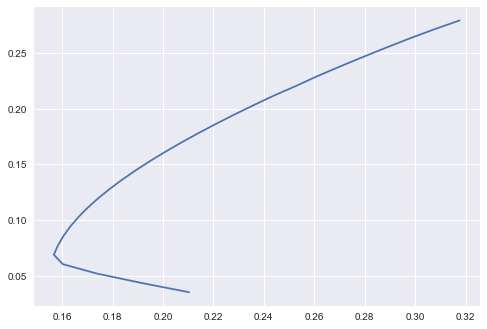

In [21]:
plt.plot(portfolio_object.MeanVarianceOpt[0]['Portfolio Volatility'],portfolio_object.MeanVarianceOpt[0]['Portfolio Return'])